# Identifying Deportation-Vulnerable Populations in Borders

Import all necessary deps:

In [3]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

Import the data table:

In [9]:
county_data = Table.read_table('counties_vulnerable_populations.csv').select(
    'county',
    'i_score',
    'unauthorized_population',
    'daca_population'
) # only read full columns
county_data

county,i_score,unauthorized_population,daca_population
"Los Angeles, CA",4,1060000,180000
"Harris, TX",6,376000,68000
"Cook, IL",1,325000,58000
"Orange, CA",6,270000,48000
"Queens, NY",2,232000,28000
"Dallas, TX",6,231000,42000
"San Diego, CA",6,207000,38000
"Maricopa, AZ",5,172000,39000
"Kings, NY",2,172000,22000
"Riverside, CA",4,161000,31000


Append columns for unauthorized population vulnerability rating and DACA population vulnerability rating.

In [12]:
# Unauthorized Population Vulnerability
unauthorized_population = county_data.column('unauthorized_population')
daca_population = county_data.column('daca_population')
i_scores = county_data.column('i_score')

WEIGHT = 1 / 3

county_data.append_column(
    'unauthorized_rating',
    [i_score * unauth_pop ** WEIGHT for unauth_pop, i_score in zip(unauthorized_population, i_scores)]
)

county_data.append_column(
    'daca_rating',
    [i_score * daca_pop ** WEIGHT for daca_pop, i_score in zip(daca_population, i_scores)]
)

county_data

county,i_score,unauthorized_population,daca_population,unauthorized_rating,daca_rating
"Los Angeles, CA",4,1060000,180000,407.845,225.849
"Harris, TX",6,376000,68000,433.059,244.899
"Cook, IL",1,325000,58000,68.7534,38.7088
"Orange, CA",6,270000,48000,387.798,218.054
"Queens, NY",2,232000,28000,122.893,60.7318
"Dallas, TX",6,231000,42000,368.148,208.562
"San Diego, CA",6,207000,38000,354.929,201.719
"Maricopa, AZ",5,172000,39000,278.065,169.561
"Kings, NY",2,172000,22000,111.226,56.0408
"Riverside, CA",4,161000,31000,217.605,125.655


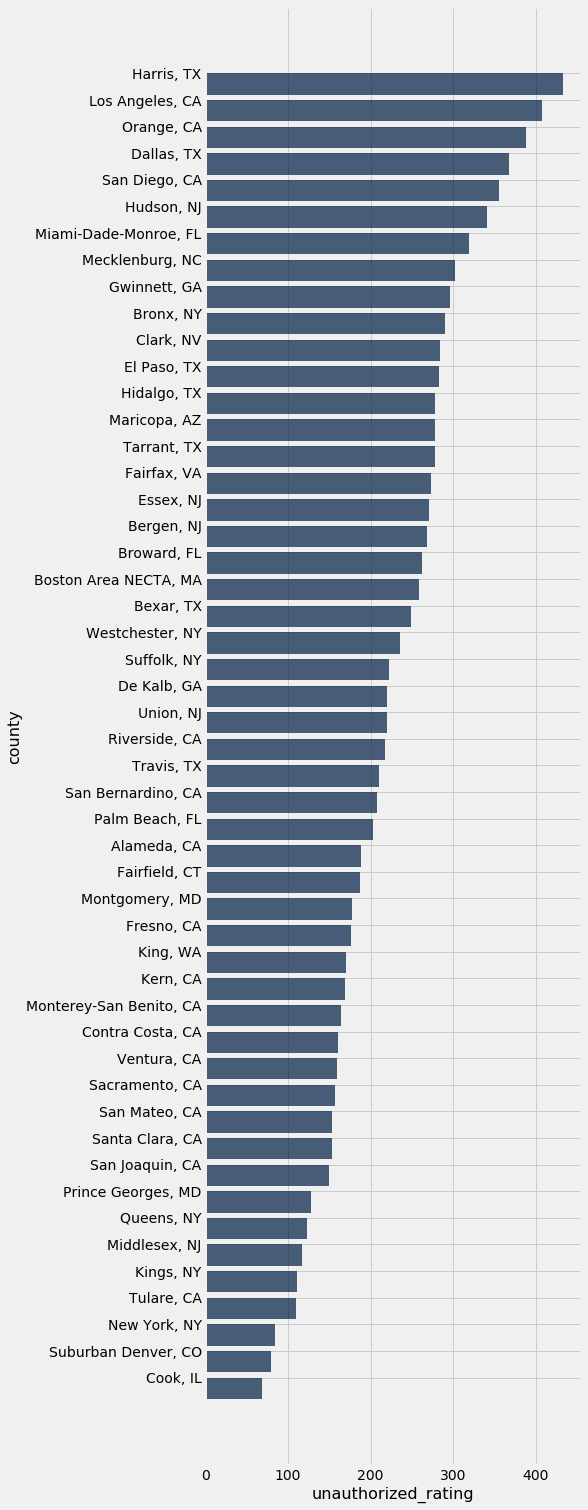

In [27]:
county_data.sort('unauthorized_rating', descending=True).barh('county', 'unauthorized_rating')

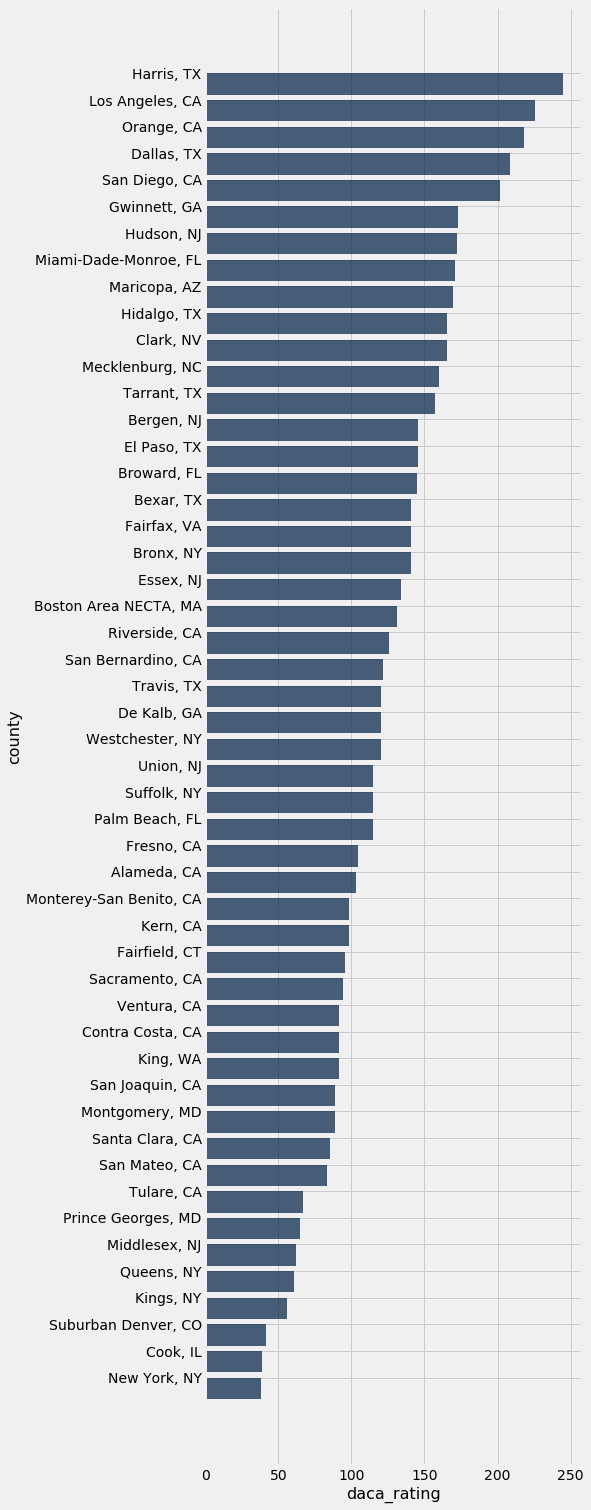

In [28]:
county_data.sort('daca_rating', descending=True).barh('county', 'daca_rating')

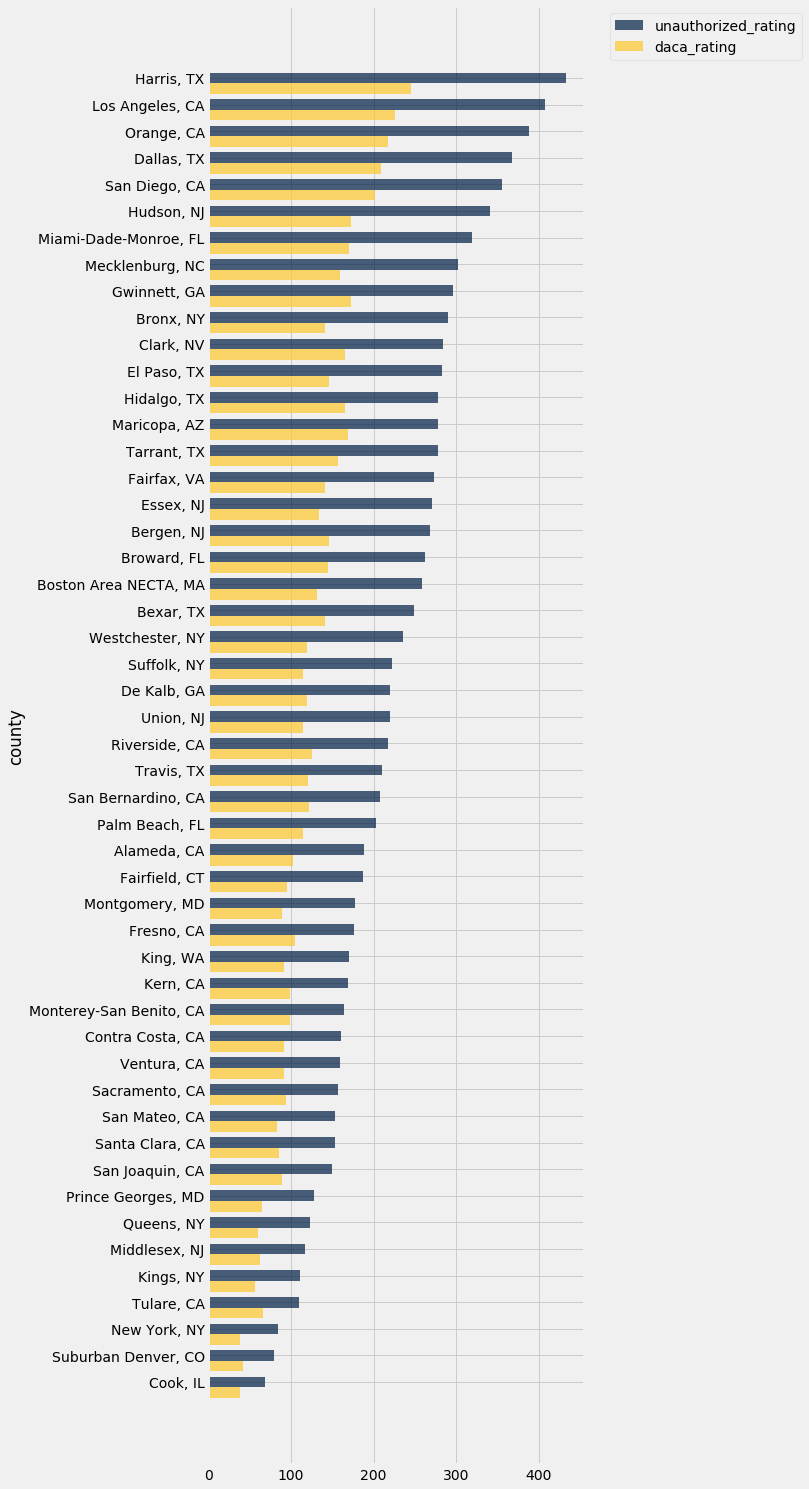

In [63]:
county_data.sort('unauthorized_rating', descending=True).barh('county', ['unauthorized_rating', 'daca_rating'])

['val', 'val2']


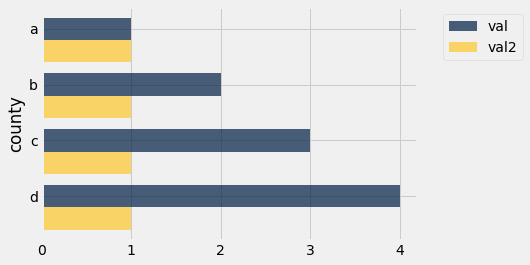

In [56]:
# TESTBED

counties = county_data.column('county')
counties2x = [*counties, *counties]
both_ratings = [*county_data.column('daca_rating'), *county_data.column('unauthorized_rating')]

def multibar(self, column_for_categories=None, select=None, overlay=True, width=6, height=4, **vargs):
    options = self.default_options.copy()
    options.update(vargs)

    yticks, labels = self._split_column_and_labels(column_for_categories)
    if select is not None:
        labels = self._as_labels(select)
    n = len(labels)
    print(labels)

    index = np.arange(self.num_rows)
    margin = 0.1
    bwidth = 1 - 2 * margin
    if overlay:
        bwidth /= len(labels)

    if 'height' in options:
        height = options.pop('height')
    else:
        height = max(4, len(index)/2)

    def draw(axis, label, color):
        if overlay:
            ypos = index + margin + (1-2*margin)*(n - 1 - labels.index(label))/n
        else:
            ypos = index
        # barh plots entries in reverse order from bottom to top
        axis.barh(ypos, self[label][::-1], bwidth,  color=color, **options)

    ylabel = self._as_label(column_for_categories)

    def annotate(axis, ticks):
        axis.set_yticks(index+0.5) # Center labels on bars
        # barh plots entries in reverse order from bottom to top
        axis.set_yticklabels(ticks[::-1], stretch='ultra-condensed')
        axis.set_xlabel(axis.get_ylabel())
        axis.set_ylabel(ylabel)

    self._visualize('', labels, yticks, overlay, draw, annotate, width=width, height=height)

    
Table.multibar = multibar

# rating_hist = Table().with_columns('county', counties2x, 'ratings', both_ratings)
# rating_hist.hist('ratings', group='county')
# count

Table().with_columns('county', ['a', 'b', 'c', 'd'], 'val', [1, 2, 3, 4], 'val2', [1, 1, 1, 1]).multibar('county', ['val', 'val2'])